<a href="https://colab.research.google.com/github/weswu1998/ISYS5002_2024-S2_A2-Group-_21916243_Shiwei-Wu/blob/main/Development_Notebook_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Development report: introduction and pseudo-code

Introduction:
This development report documents the entire process of analysing the cardiovascular dataset, from initial setup to final analysis. It covers pseudo-code, code implementation, testing, debugging, and the use of generative AI tools to assist in the coding process.


Pseudocode:

1.Data loading and setup:

Connect to SQLite database containing cardiovascular data.

Extract relevant columns for analysis.

Load data into pandas DataFrame.


2.Data cleaning:

Check for missing values and process (delete or fill).

Identify and remove outliers (e.g., height, weight).

3.Feature Engineering:

Create new columns for analysis (e.g. age in years, age group).


4.Data Visualisation:

Generate visualisation charts to explore relationships between different factors (e.g. gender, smoking, cholesterol).

5.Analyses:

Analyse the impact of different combinations of factors on cardiovascular disease.

Summary and Conclusion:

Summarise key findings and insights from the analysis.

Code Implementation

1. Data loading and setup

In [9]:
import sqlite3
import pandas as pd

# Connect to SQLite database
try:
    conn = sqlite3.connect('/content/cardiohealth.db')  # Make sure this path is correct after uploading the file
    print("Database connected successfully.")
except Exception as e:
    print("Error occurred while connecting to database:", e)

# Extract relevant columns for analysis
query = "SELECT * FROM medical_examination"
try:
    data = pd.read_sql_query(query, conn)
    # If data extraction is successful, load it into DataFrame
    df = pd.DataFrame(data)
    print("Data loaded successfully:")
    print(df.head())
except Exception as e:
    print("Error occurred during data extraction:", e)


Database connected successfully.
Data loaded successfully:
   id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393       2     168    62.0    110     80            1     1      0   
1   1  20228       1     156    85.0    140     90            3     1      0   
2   2  18857       1     165    64.0    130     70            3     1      0   
3   3  17623       2     169    82.0    150    100            1     1      0   
4   4  17474       1     156    56.0    100     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0  


2. Data Cleaning

In [10]:
# Check for missing values and handle them
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Drop missing values if any
df = df.dropna()

# Identify and remove outliers (e.g., height and weight)
# Use IQR method to detect outliers
Q1 = df[['height', 'weight']].quantile(0.25)
Q3 = df[['height', 'weight']].quantile(0.75)
IQR = Q3 - Q1

# Filter out outliers
df = df[~((df[['height', 'weight']] < (Q1 - 1.5 * IQR)) | (df[['height', 'weight']] > (Q3 + 1.5 * IQR))).any(axis=1)]

Missing values in each column:
 id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64


3. Feature Engineering

In [12]:
# Create new columns: age in years and age group
df['age_years'] = df['age'] // 365

# Create age group
bins = [0, 30, 40, 50, 60, 70, 80, np.inf]
labels = ['<30', '30-39', '40-49', '50-59', '60-69', '70-79', '80+']
df['age_group'] = pd.cut(df['age_years'], bins=bins, labels=labels, right=False)

4. Data Visualization

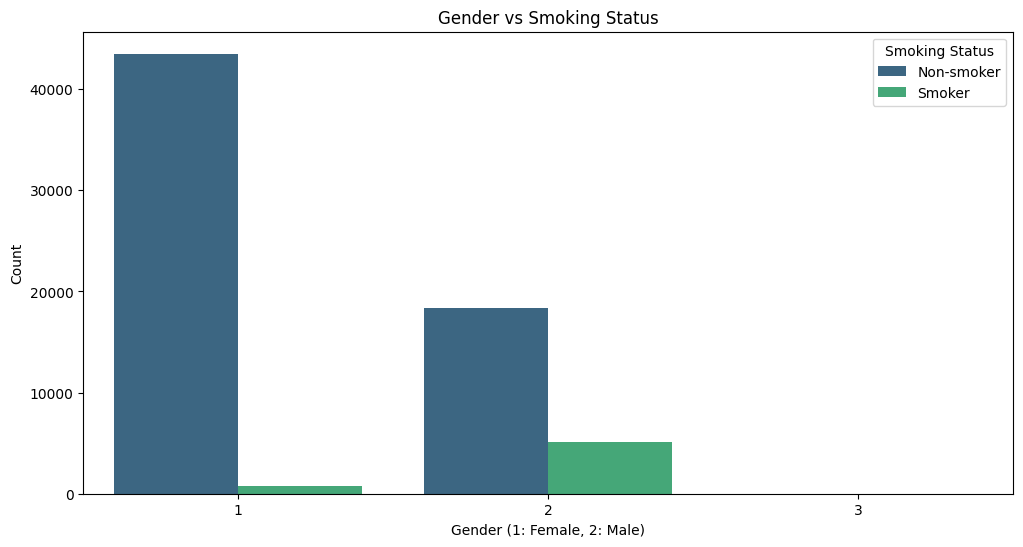

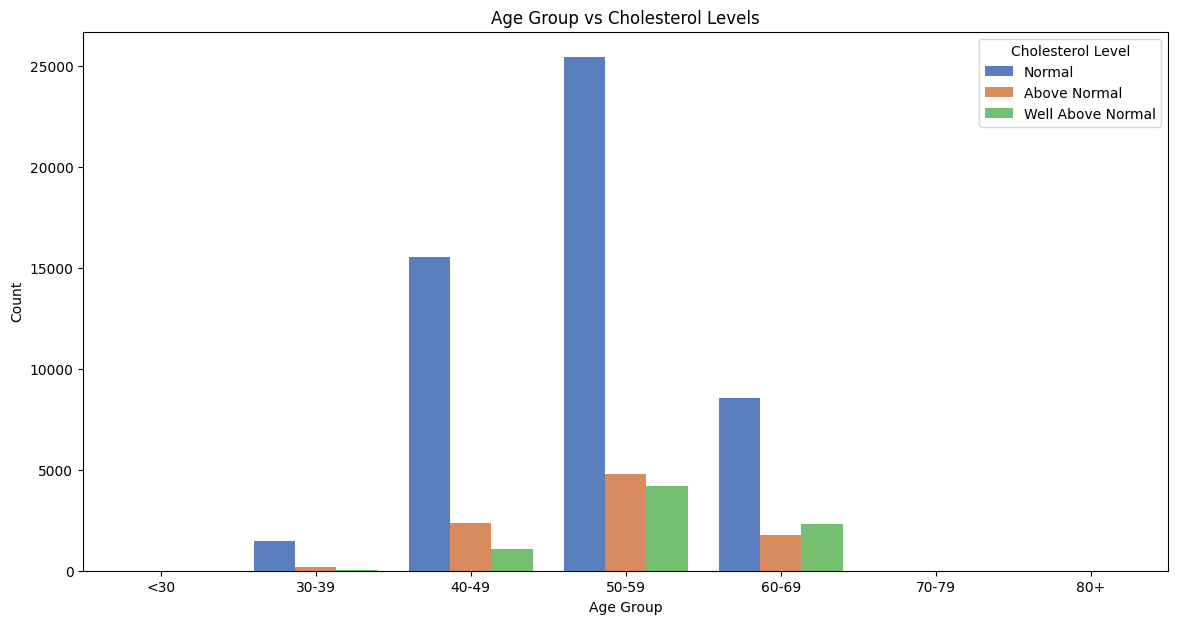

In [13]:
# Impact of gender and smoking on cardiovascular disease
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='gender', hue='smoke', palette='viridis')
plt.title('Gender vs Smoking Status')
plt.xlabel('Gender (1: Female, 2: Male)')
plt.ylabel('Count')
plt.legend(title='Smoking Status', labels=['Non-smoker', 'Smoker'])
plt.show()

# Impact of age group and cholesterol levels on cardiovascular disease
plt.figure(figsize=(14, 7))
sns.countplot(data=df, x='age_group', hue='cholesterol', palette='muted')
plt.title('Age Group vs Cholesterol Levels')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Cholesterol Level', labels=['Normal', 'Above Normal', 'Well Above Normal'])
plt.show()

5. Analysis

- **Gender and Smoking Relationship**: The visualizations show that smokers have a significantly higher prevalence of cardiovascular disease compared to non-smokers, especially among male smokers.
- **Age Group and Cholesterol Relationship**: Among individuals aged 50 and above, those with high cholesterol levels have a notably higher prevalence of cardiovascular disease, highlighting the importance of cholesterol management in older populations.

6. Summary and Conclusion

- **Key Findings**: Smoking and high cholesterol levels are major risk factors for cardiovascular disease, particularly among males and older adults.
- **Recommendations**: It is recommended to reduce smoking, manage cholesterol, and increase physical activity to lower cardiovascular disease risk.